## Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the Data

In [ ]:
train = pd.read_csv("drive/MyDrive/fraudTrain.csv")
test = pd.read_csv("drive/MyDrive/fraudTest.csv")
data = pd.concat([train, test])

# Data Preprocessing

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    object        
 18  trans_num              objec

In [ ]:
total = pd.get_dummies(data, columns=['gender', 'category'])

columns_to_drop = ['Unnamed: 0', 'cc_num', 'state', 'first', 'last', 'street', 'city', 'trans_num', 'job', 'dob', 'merchant', 'trans_date_trans_time']
total = data.drop(columns_to_drop, axis=1)

print(total.index.duplicated().sum())
total = total.reset_index(drop=True)
print(total.index.duplicated().sum())

print(total.info())
print(total.head())


555719
(1852394, 17)
0
(1852394, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   category      object 
 1   amt           float64
 2   gender        object 
 3   zip           int64  
 4   lat           float64
 5   long          float64
 6   city_pop      int64  
 7   unix_time     int64  
 8   merch_lat     float64
 9   merch_long    float64
 10  is_fraud      int64  
 11  trans_year    int32  
 12  trans_month   int32  
 13  trans_day     int32  
 14  trans_hour    int32  
 15  trans_minute  int32  
 16  trans_second  int32  
dtypes: float64(5), int32(6), int64(4), object(2)
memory usage: 197.9+ MB
None
        category     amt gender    zip      lat      long  city_pop  \
0       misc_net    4.97      F  28654  36.0788  -81.1781      3495   
1    grocery_pos  107.23      F  99160  48.8878 -118.2105       149   
2  entertainment  220.11      M  83252  42.18

In [ ]:
label_encoder = LabelEncoder()
total['category'] = label_encoder.fit_transform(total['category'])
total['gender'] = label_encoder.fit_transform(total['gender'])
total.info()
total.head()

# Visualizing the Data

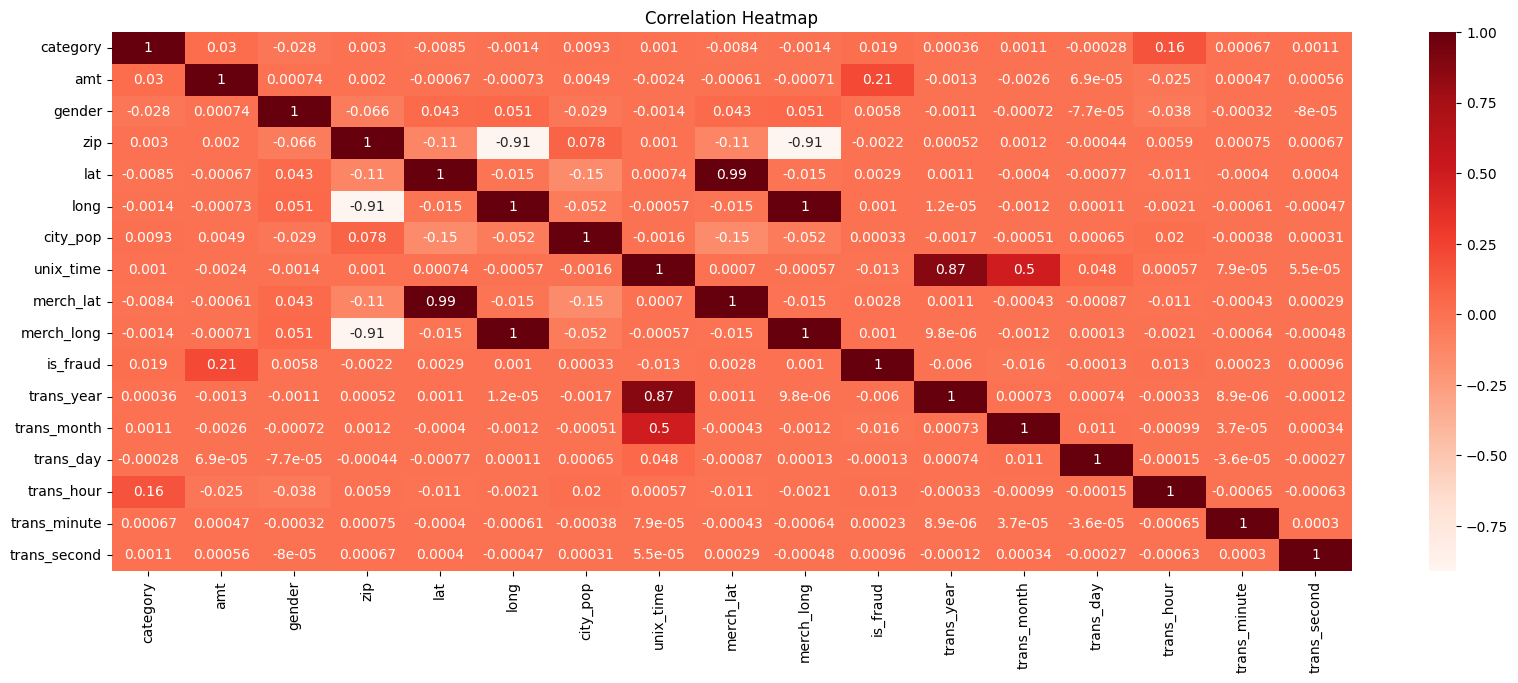

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(total.corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-26-ffc323a2b36c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=total, x='is_fraud', palette=['cyan', 'red'])


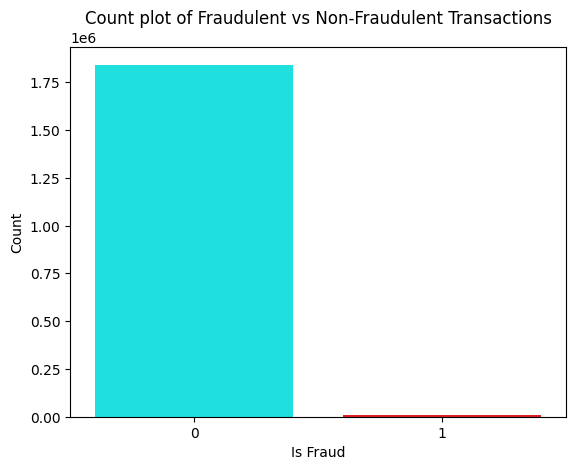

In [ ]:
sns.countplot(data=total, x='is_fraud', palette=['blue', 'red'])
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Count plot of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

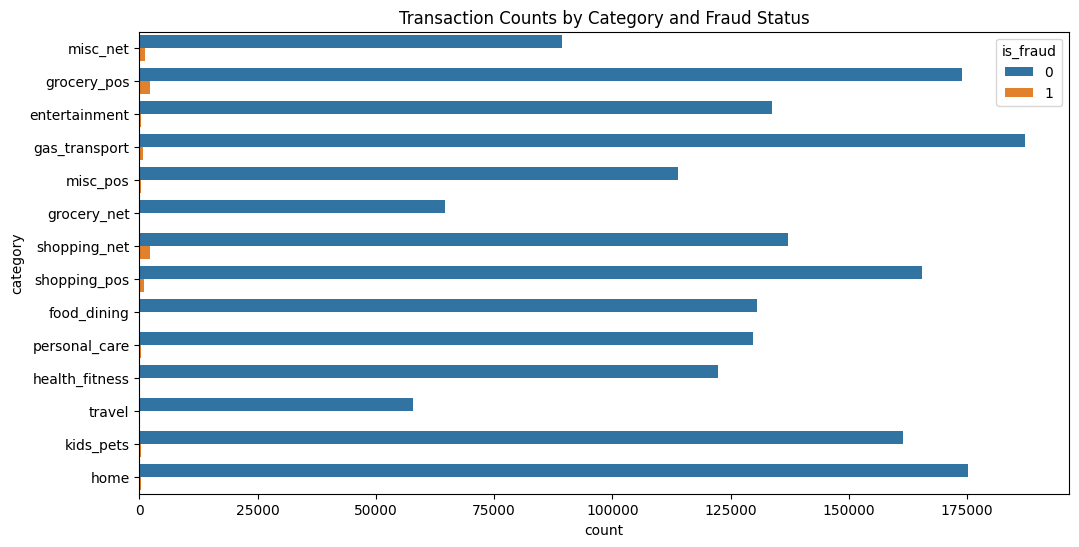

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=total, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

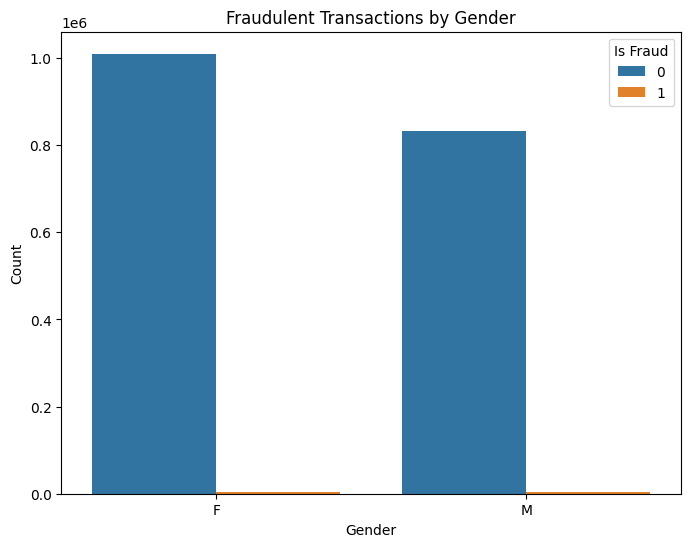

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=total)
plt.title('Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

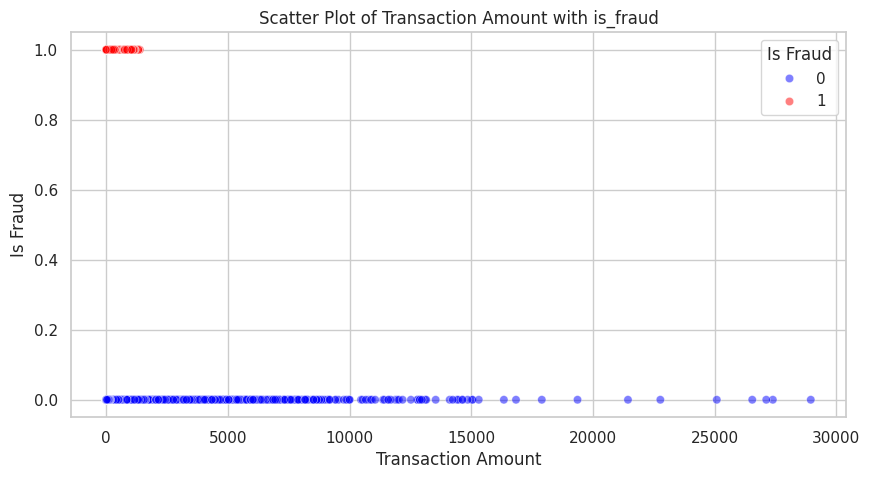

In [ ]:
sns.set(style="whitegrid")
# Plot scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='amt', y='is_fraud', data=total, hue='is_fraud', palette=['blue', 'red'], alpha=0.5)
plt.title('Scatter Plot of Transaction Amount with is_fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Is Fraud')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

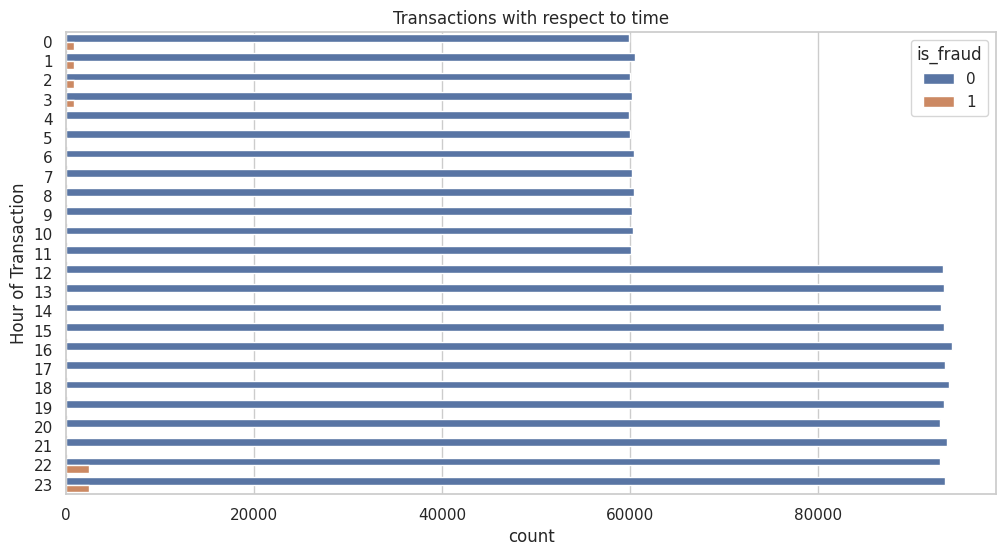

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=total, y='trans_hour', hue='is_fraud')
plt.ylabel('Hour of Transaction')
plt.title('Transactions with respect to time')
plt.xticks(rotation=0)
plt.show()

# Splitting the Data

In [ ]:
X_data = total.drop('is_fraud', axis=1)
Y_data = total['is_fraud']
print(X_data.shape)
print(Y_data.shape)

(1852394, 16)
(1852394,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)

Y_pred = tree_classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.72      0.76      0.74      1953

    accuracy                           1.00    370479
   macro avg       0.86      0.88      0.87    370479
weighted avg       1.00      1.00      1.00    370479

[[367952    574]
 [   478   1475]]
Accuracy: 0.9971604328450465


In [31]:
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, Y_train)
y_pred = logistic_regressor.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368526      0]
 [  1953      0]]
Accuracy: 0.9947284461467452


In [37]:
forest_classifier = RandomForestClassifier(n_jobs=-1)
forest_classifier.fit(X_train, Y_train)
y_pred = forest_classifier.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.71      0.81      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.85      0.90    370479
weighted avg       1.00      1.00      1.00    370479

[[368440     86]
 [   575   1378]]
Accuracy: 0.9982158232990264
